Sannsynligheten for å finne en partikkel i en posisjon x med potensiell energi $V(x)$ er 
$P(x)=Ze^{-\beta V(x)}$, 
der $\beta=\frac{1}{k_bT}$ hvor $k_b$ er Boltzmanns konstant og T er temperaturen. Partisjonsfunksjonen $Z$ summerer over de ulike energitilstandene i et system, $Z=\sum_{i=1}^{\infty}e^{-\beta V(x)}$. 
Sannsynligheten for å finne en gitt partikkel med energi $E_i$ blir dermed 
$\pi_i = Z^{-1} e^{-\beta E_i}$.

Sannsynligheten for at en partikkel går til høyre, venstre eller står i ro kan beregnes ut i fra dette. Partisjonsfunksjonen for et slikt system blir

$Z=e^{-\beta V(x_0-1)}+e^{-\beta V(x_0)}+e^{-\beta V(x_0-1)}$,

der $x_0$ er startposisjonen til partikkelen. Sannsynligheten for å gå til høyre, $P^{+}$, blir da

$P^{+}=Z^{-1}e^{-\beta V(x_0 +1)} = \frac{e^{-\beta V(x_0 +1)}}{e^{-\beta V(x_0 -1)}+e^{-\beta V(x_0)}+e^{-\beta V(x)_0 + 1}} = \frac{1}{e^{\beta V(x_0 +1)}(e^{-\beta V(x_0 -1)}+e^{-\beta V(x_0)}+e^{-\beta V(x_0 -1)})}$.

$P^{+}=\frac{1}{e^{-\beta (V(x_0 -1)-V(x_0 +1)} + e^{-\beta (V(x_0)-V(x_0 +1))}}$

Tilsvarende utregning gir at sannsynligheten for at partikkelen står i ro, $P^{0}$ eller går til venstre, $P^{-}$, blir henholdsvis

$P^{0}=\frac{1}{e^{-\beta (V(x_0 -1)-V(x_0)} + e^{-\beta (V(x_0 +1)-V(x_0))}}$

og

$P^{-}=\frac{1}{e^{-\beta (V(x_0 +1)-V(x_0 -1)} + e^{-\beta (V(x_0)-V(x_0 -1))}}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random

Definerer konstanter og potensial

In [2]:
T = 273.15 #[K]
k_B = 1.38*10**(-23) #[J/K]
B = 1/k_B*T
Bk = 0.01
k= Bk/B #[J]


def V(x):
    return k

Definerer sannsynligheter

In [3]:
def p_pluss(x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 -1)-V(x_0+1))) + np.exp(-B*(V(x_0)-V(x_0+1))))
    return p

def p_0(x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 -1)-V(x_0))) + np.exp(-B*(V(x_0+1)-V(x_0))))
    return p

def p_minus(x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 +1)-V(x_0-1))) + np.exp(-B*(V(x_0)-V(x_0-1))))
    return p

Definerer random walk funksjonen

In [4]:
def randomWalk(antall_partikler, antall_steg):
    posisjoner = np.zeros(antall_partikler)
    for p in range(0,antall_partikler):
        pos = startpos
        for s in range (0,antall_steg):
            tilfeldig = random.uniform(0.0,1.0)
            if (tilfeldig <= p_minus(startpos)):
                pos -= 1
            elif (tilfeldig > (1-p_pluss(startpos))):
                pos += 1
            else:
                pos = pos
        posisjoner[p] = pos
    return posisjoner


Vekting av elementer i liste

In [5]:
def vekting(array):
    andeler = []
    posisjoner, antall = np.unique(array,return_counts=True)
    for i in range(0,len(antall)):
        andel = antall[i]/len(array)
        andeler.append(andel)
    np.array(posisjoner)
    np.array(andeler)
    return posisjoner, andeler
        

Definerer parametere ??

In [6]:
antall_partikler = 10000
antall_steg = 200
startpos = 0


Prøver å kjøre

In [7]:
posisjoner = randomWalk(antall_partikler,antall_steg)
x,y = vekting(posisjoner)

Prøver å plotte

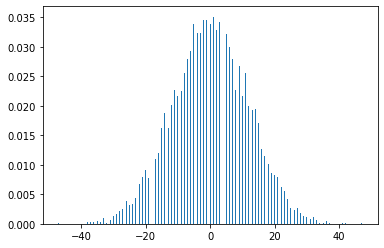

In [8]:
plt.bar(x,y,width=0.3)
plt.show()

## oppg 5.1

Definerer konstanter og parametre

In [9]:
alpha = 0.8
T_p = 500   #Antall steg per syklus
h = 1       #Steglengde
N_x = 90    #antall x-verdier i en periode
beta = 1/(1.3806*10**-(23)*298)     #Antar romtemperatur
k = 4.1142*10**-18       #Velger k slik at k*beta = 1000
N_p = 12*N_x    #Partikkeltall
antall_sykluser = 10

In [10]:
def V_2(x):
    return 2*k/N_x

#Må passe på at punktene får riktig x-verdi
def V_1(x):
    if(x<0):
        return(-k*x/((1-alpha)*N_x))
    else:
        return(k*x/(alpha*N_x))

def koordinatoversetter(x):
    x_verdi_til_pot = x
    if x_verdi_til_pot >= N_x + alpha * N_x:
        x_verdi_til_pot -= 2 * N_x
    elif x_verdi_til_pot >= alpha * N_x:
        x_verdi_til_pot -= N_x
    return x_verdi_til_pot


#Finner sannsynlighetene for å bevege seg opp, ned eller bli værende
def p_pluss(x, potensial):
    return(1/(1+np.exp(-beta*(potensial(x)-potensial(x+h)))+np.exp(-beta*(potensial(x-h)-potensial(x+h)))))

def p_null(x, potensial):
    return (1 / (1 + np.exp(-beta * (potensial(x + h) - potensial(x))) + np.exp(
        -beta * (potensial(x - 1) - potensial(x)))))
def p_minus(x, potensial):
    return (1 / (1 + np.exp(-beta * (potensial(x) - potensial(x - h))) + np.exp(
        -beta * (potensial(x + 1) - potensial(x -1)))))

#Lager startfordeling for main(startfordeling)
def startfordeling1():
    startfordeling1 = np.array([])
    for i in range(2*N_x):
        for e in range(6):
            startfordeling1 = np.append(startfordeling1, [i])
    #Startfordelingen er nå definert med seks partikler i hvert punkt.
    return startfordeling1

def startfordeling2():
    startfordeling2 = np.array([])
    for i in range(int(N_p/2)):
        startfordeling2 = np.append(startfordeling2, 0)
    for j in range(int(N_p/2)):
        startfordeling2 = np.append(startfordeling2, 90)
    #Startfordeling to har halvparten av partiklene i x=0 og den andre halvparten i x=90
    return(startfordeling2)

def plotFordeling(array):
    verdi, antall = np.unique(array, return_counts=True)
    #Verdien vil har antallet på korresponderende plass i antall-lista
    plt.bar(verdi, antall)
    print(verdi, antall)
    plt.ylim(0, max(antall))
    plt.xlim(-1, 180)
    plt.show()

In [11]:
#Lager startfordeling i main()
def motorProteins(startfordeling):
    fordeling = startfordeling
    partikkelstrømliste = []   
    hoppsannsynlighetV_1 = {}
    hoppsannsynlighetV_2 = {}
    #x_er heltallsverdier, er viktig at denne løkken ikke skaper feil pga utregninger   
    for i in range(int(round(-(1-alpha)*N_x)), int(alpha*N_x)):
        hoppsannsynlighetV_1[i*h] = [p_minus(i*h, V_1), p_null(i*h, V_1), p_pluss(i*h, V_1)]
    
    for i in range(2*N_x):
        hoppsannsynlighetV_2[i*h] = [p_minus(i*h, V_2), p_null(i*h, V_2), p_pluss(i*h, V_2)]
   
    for k in range(0, 2*antall_sykluser):
        #Alternerer mellom potensial 2 og 1
        if k%2 == 0:
            sannsynligheter = hoppsannsynlighetV_2
        else:
            sannsynligheter = hoppsannsynlighetV_1
        
        #Vi teller opp antall partikkelsteg etter hvert som tiden går, og lagrer dem i variabelen
        #partikkelstrøm
        partikkelstrøm = 0
        
        for i in range(0, T_p):
            for j in range(0, len(fordeling)):
                tall = random.uniform(0, 1)
                if k%2 == 0:
                    #X-verdien til potensial 2 kan stå som den er slik funksjonen er definert
                    x_verdi = fordeling[j]
                else:
                    #Vi trenger kun å transformere x-koordinatet i potensial 1.
                    x_verdi = koordinatoversetter(fordeling[j])
                if tall <= sannsynligheter[x_verdi][0]:
                    fordeling[j] -= h
                    partikkelstrøm -= 1
                    #Vi må passe på at ingen partikler faller utenfor det gyldige området
                    if fordeling[j] == -1:
                        fordeling[j] = 179
                elif tall >= 1-sannsynligheter[x_verdi][2]:
                    fordeling[j] += h
                    partikkelstrøm += 1
                    #Igjen: Vi må passe på at ingen partikler faller utenfor det gyldige området
                    if fordeling[j] == 180:
                        fordeling[j] = 0
        
#        plotFordeling(fordeling)
        
        partikkelstrømliste.append(partikkelstrøm/(6*2*N_x))
        #Har nå lagret partikkelstrømmen per syklushalvdel. Må behandle den litt slik at den ønskede formen oppstår.
    
    print(partikkelstrømliste)
    gjennomsnittsstrøm = []
    for i in range(int(len(partikkelstrømliste)/2)):
        gjennomsnittsstrøm.append((partikkelstrømliste[2*i] + partikkelstrømliste[2*i+1])/(2*T_p))
    print(gjennomsnittsstrøm)


In [13]:
motorProteins(startfordeling1())

{-18: [5.557977948710113e-49, 7.455184738629963e-25, 1.0], -17: [5.557977948711139e-49, 7.455184738631394e-25, 1.0], -16: [5.557977948711139e-49, 7.455184738629963e-25, 1.0], -15: [5.557977948710113e-49, 7.455184738629963e-25, 1.0], -14: [5.557977948710665e-49, 7.455184738630653e-25, 1.0], -13: [5.557977948710665e-49, 7.455184738629963e-25, 1.0], -12: [5.557977948710665e-49, 7.455184738630653e-25, 1.0], -11: [5.557977948711139e-49, 7.455184738630653e-25, 1.0], -10: [5.557977948710665e-49, 7.455184738629963e-25, 1.0], -9: [5.557977948710665e-49, 7.455184738630653e-25, 1.0], -8: [5.557977948710665e-49, 7.455184738629963e-25, 1.0], -7: [5.557977948710349e-49, 7.455184738630335e-25, 1.0], -6: [5.557977948710903e-49, 7.455184738630653e-25, 1.0], -5: [5.557977948710903e-49, 7.455184738630335e-25, 1.0], -4: [5.557977948710508e-49, 7.455184738630123e-25, 1.0], -3: [5.557977948710665e-49, 7.455184738630493e-25, 1.0], -2: [5.557977948710744e-49, 7.455184738630335e-25, 1.0], -1: [5.55797794871066

[-0.006481481481481481, -26.326851851851853, -0.36666666666666664, -13.466666666666667, 0.9916666666666667, -14.491666666666667, 0.10833333333333334, -13.940740740740742, 0.549074074074074, -13.216666666666667, -0.47314814814814815, -15.110185185185186, 0.6231481481481481, -14.873148148148148, 0.2759259259259259, -13.775925925925925, 0.3490740740740741, -14.26574074074074, 0.0824074074074074, -13.915740740740741]
[-0.026333333333333337, -0.013833333333333335, -0.0135, -0.01383240740740741, -0.012667592592592593, -0.015583333333333334, -0.01425, -0.0135, -0.013916666666666666, -0.013833333333333335]


In [14]:
motorProteins(startfordeling2())

{-18: [5.557977948710113e-49, 7.455184738629963e-25, 1.0], -17: [5.557977948711139e-49, 7.455184738631394e-25, 1.0], -16: [5.557977948711139e-49, 7.455184738629963e-25, 1.0], -15: [5.557977948710113e-49, 7.455184738629963e-25, 1.0], -14: [5.557977948710665e-49, 7.455184738630653e-25, 1.0], -13: [5.557977948710665e-49, 7.455184738629963e-25, 1.0], -12: [5.557977948710665e-49, 7.455184738630653e-25, 1.0], -11: [5.557977948711139e-49, 7.455184738630653e-25, 1.0], -10: [5.557977948710665e-49, 7.455184738629963e-25, 1.0], -9: [5.557977948710665e-49, 7.455184738630653e-25, 1.0], -8: [5.557977948710665e-49, 7.455184738629963e-25, 1.0], -7: [5.557977948710349e-49, 7.455184738630335e-25, 1.0], -6: [5.557977948710903e-49, 7.455184738630653e-25, 1.0], -5: [5.557977948710903e-49, 7.455184738630335e-25, 1.0], -4: [5.557977948710508e-49, 7.455184738630123e-25, 1.0], -3: [5.557977948710665e-49, 7.455184738630493e-25, 1.0], -2: [5.557977948710744e-49, 7.455184738630335e-25, 1.0], -1: [5.55797794871066

[-0.3333333333333333, -14.75, -0.3287037037037037, -13.421296296296296, 0.6842592592592592, -14.267592592592592, 0.325, -14.241666666666667, -0.5361111111111111, -15.713888888888889, 0.13240740740740742, -13.96574074074074, -0.42314814814814816, -14.076851851851853, -0.05185185185185185, -14.114814814814816, -0.3425925925925926, -15.907407407407407, -0.3296296296296296, -13.587037037037037]
[-0.015083333333333334, -0.01375, -0.013583333333333334, -0.013916666666666667, -0.01625, -0.013833333333333333, -0.0145, -0.014166666666666668, -0.01625, -0.013916666666666666]
